## Seabornでよく使う操作

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats={"png","retina"} #高解像度化
import seaborn as sns
sns.set()
import japanize_matplotlib #pip install japanize-matplotlib #日本語化 #効かない...

import numpy as np
import pandas as pd

In [2]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
print(data.shape)
data.head()

(2000, 2)


,x,y
0,-0.040039,0.051775
1,3.219698,1.436139
2,-1.454191,-1.745054
3,-4.493746,-1.897803
4,0.979676,-0.350854


### 分布を推定して可視化
kdeplotとか使う

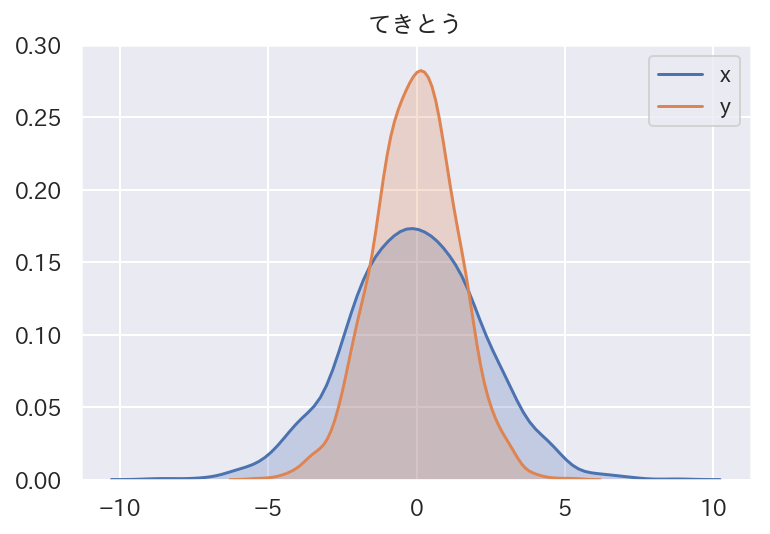

In [3]:
#分布推定して可視化してくれる
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
plt.ylim(0,0.3)
plt.title("てきとう");

/Users/masaki/.virtualenvs/myenv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


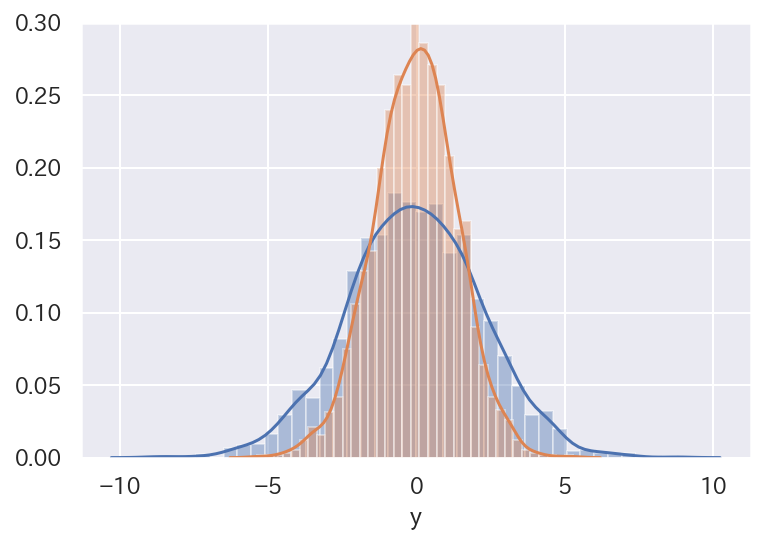

In [4]:
sns.distplot(data['x']) #distplotはヒストグラムも重ねて描く
sns.distplot(data['y'])
plt.ylim(0,0.3);

同時分布も見たい

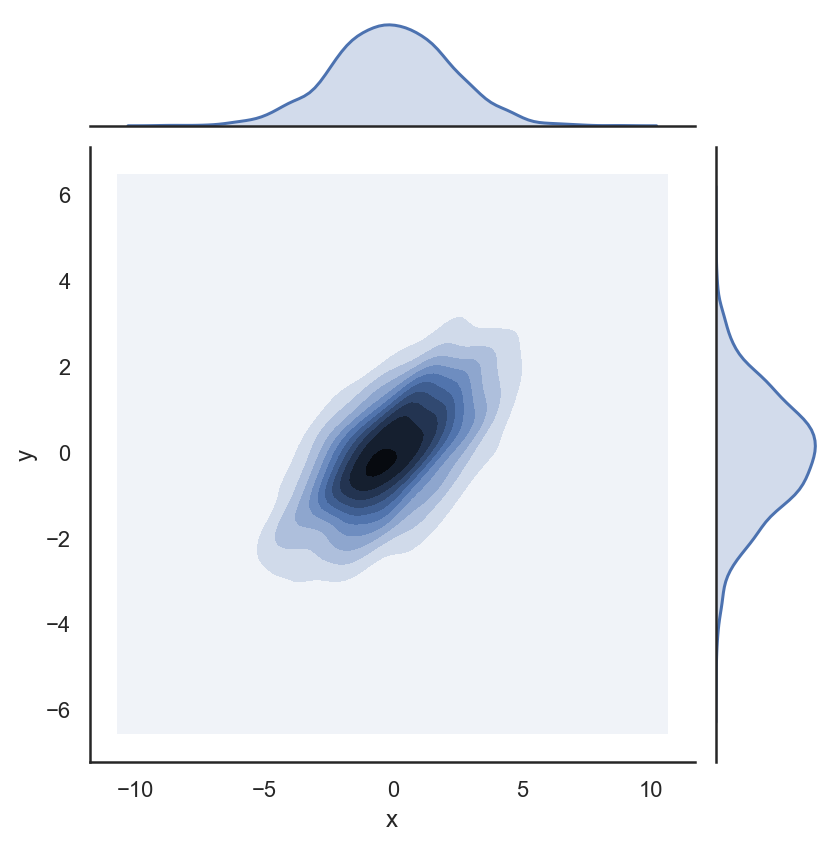

In [5]:
with sns.axes_style('white'):
    #背景が変な感じになるのでwhiteにしておく
    sns.jointplot("x", "y", data, kind='kde');

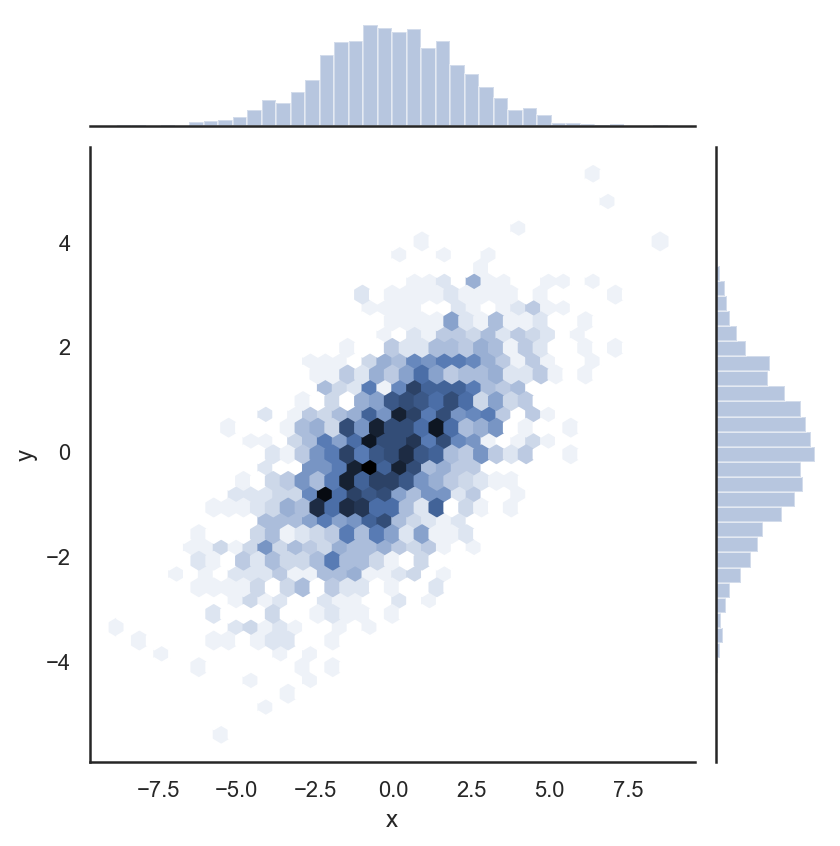

In [6]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex'); #かっこいい

### ペアプロット
データを俯瞰する

In [7]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


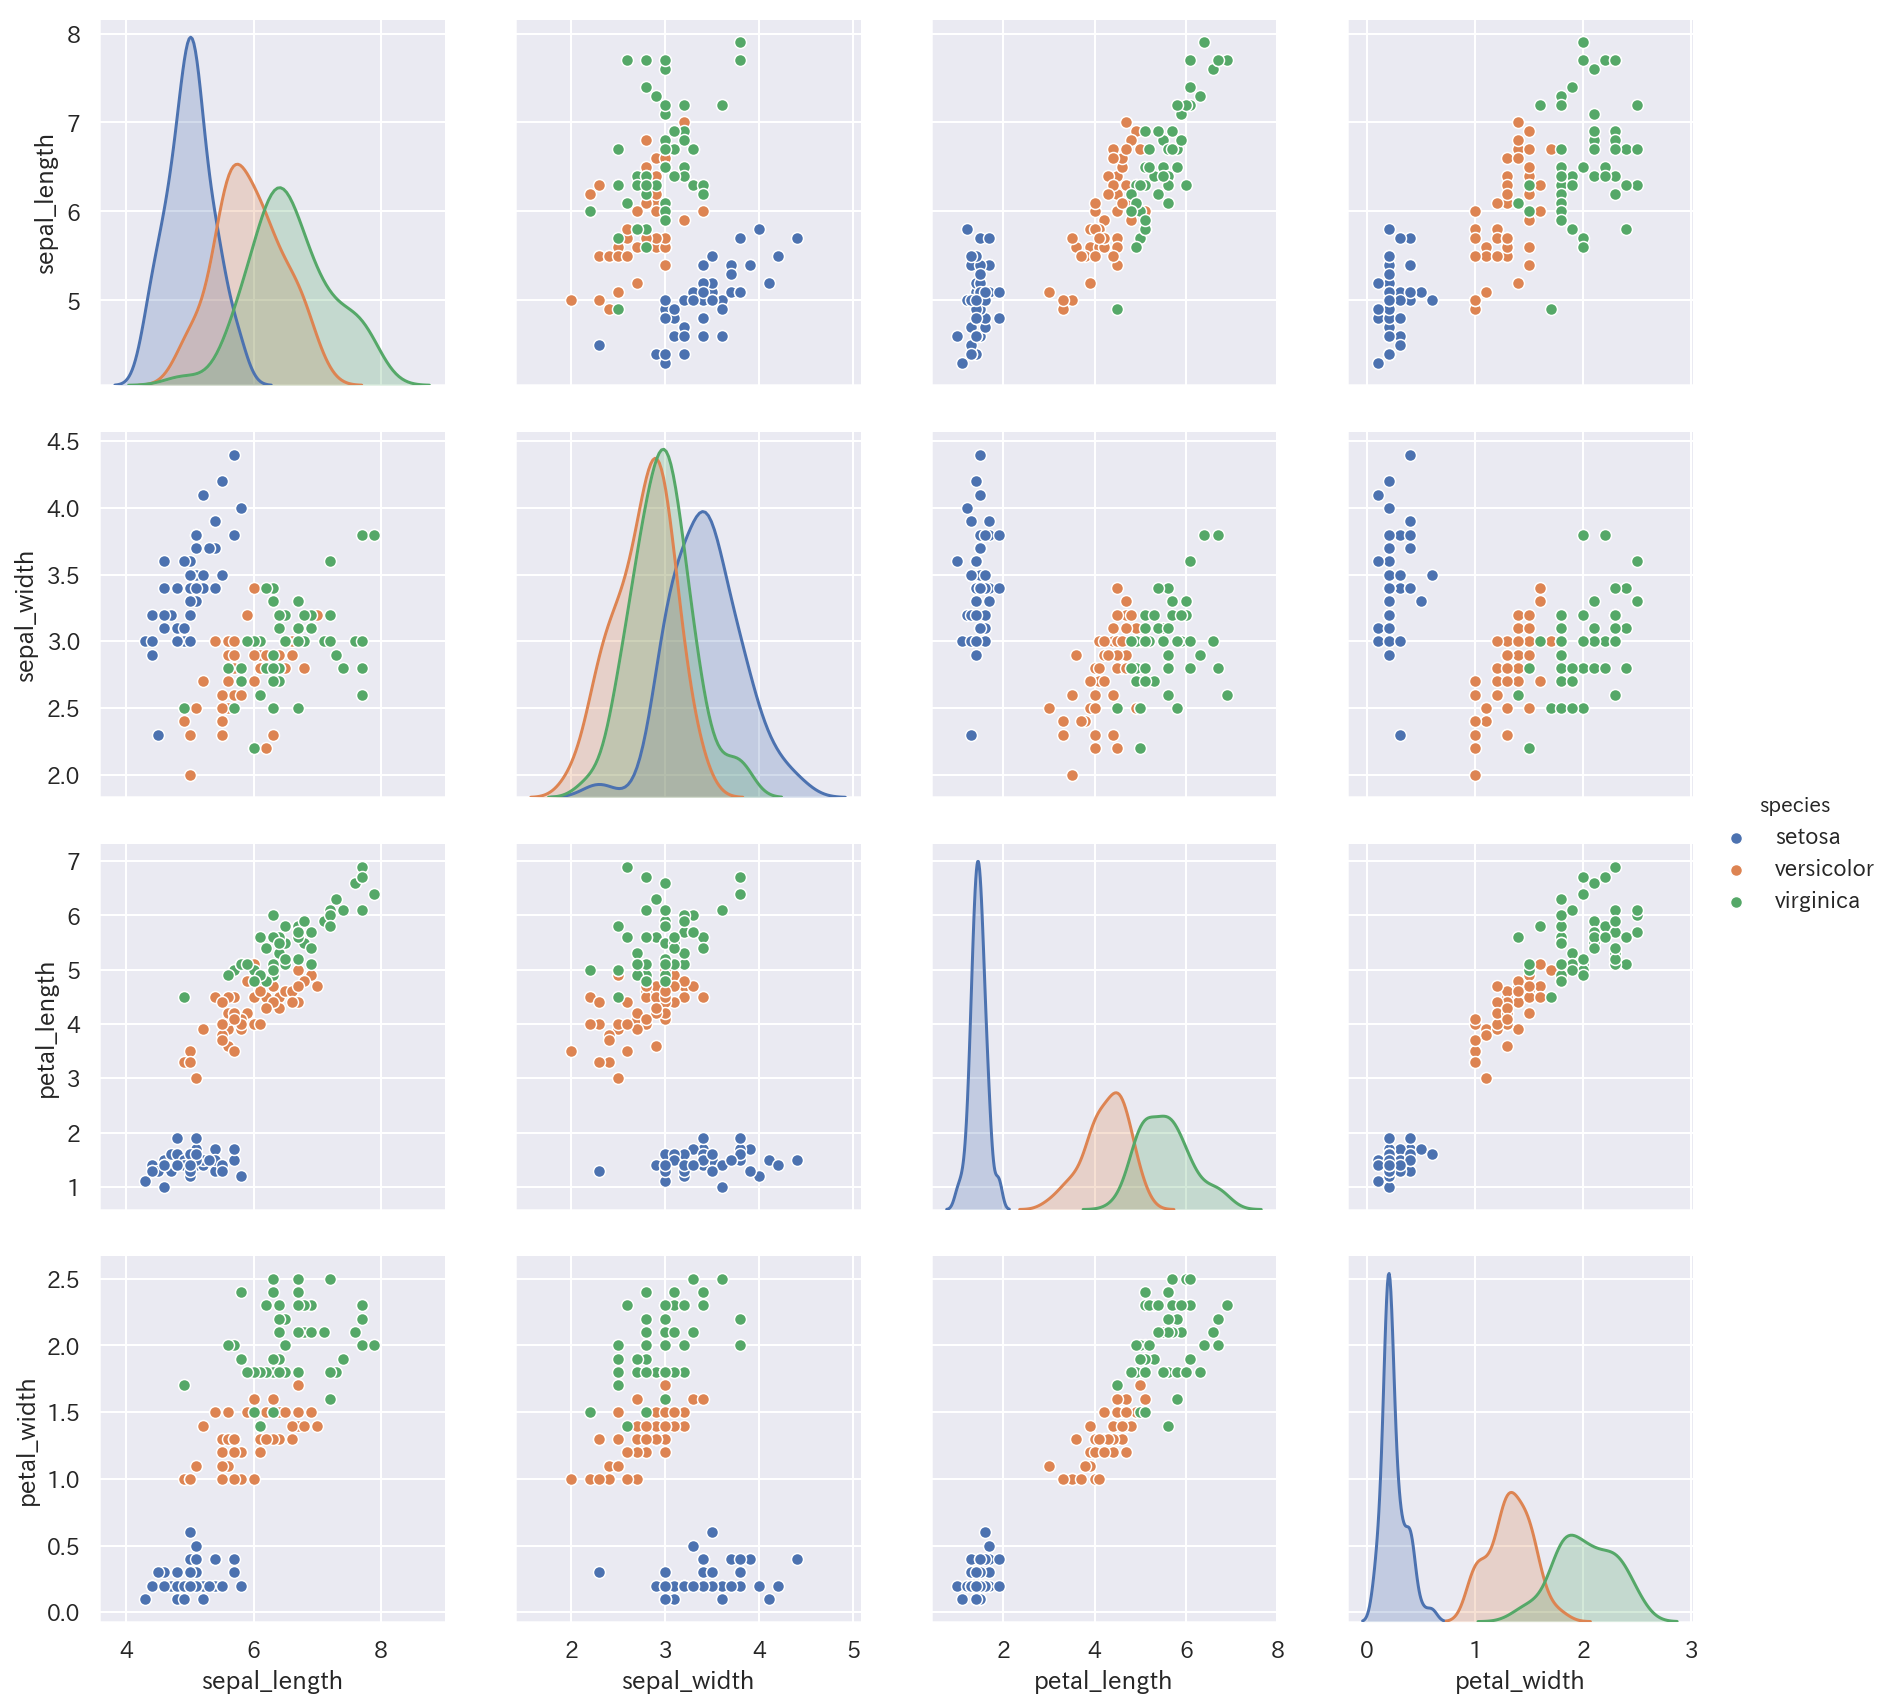

In [8]:
sns.pairplot(iris, hue='species', height=3);
#hueにラベルに相当する名前を入れる
#次元数が多くなると相当重くなるので注意

### 階層ヒストグラム
複数のカテゴリ別に、変量のヒストグラムを見る

Seabornでは、一部のサブセットを抜き取るのにFacetGridを用いる

In [9]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


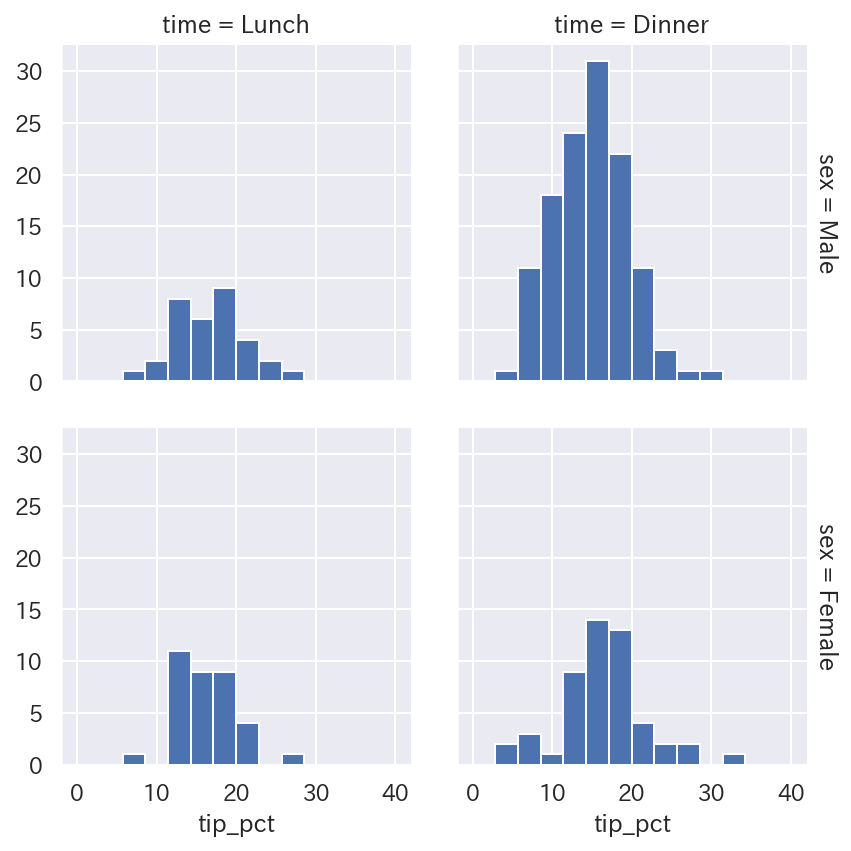

In [10]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));